# Image classification

The dataset containing 5 label within category shoes, monitor, woman fashion, car, and hat.

Each picture inserted into separated file on 00, 01, 02, 03, 04 file and the label stored in csv.

In [1]:
#open the dataset containing filename and its label
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset/train_data.csv')
df.head()


,filename,category
0,a782a5b475f99b995245eb4b1a6a11f4.jpg,0
1,11481865_99c50329-c1f9-4bb6-a2fb-c7235ed11f12_...,0
2,sepatu_pria_casual_GF_3806.jpg,0
3,pavillion-3441-9076902-1.jpg,0
4,77c0f92c2bf97a923f861522dd404438.jpg,0


In [2]:
df.sample(n=10)

,filename,category
51,Lcdmonitor.jpg,1
33,5d81a35aae92b.jpg,0
19,11481865_610a6686-87f5-49d1-a8f7-1570ea4d4b92_...,0
44,16655158_71d34702-6bda-472d-98b1-c63115b12418_...,1
74,monitor-lcd-acer-h235h.jpg,1
36,SEPATU_SLIP_ON_CASUAL_SUPERGA_COTU_BLACK_ORIGI...,0
166,eb1252ac5e905b7c1d8a746fa85a36ac.jpg,4
25,70750978-555960258521360-6856543101784021406-n...,0
1,11481865_99c50329-c1f9-4bb6-a2fb-c7235ed11f12_...,0
135,HTB1H5a4HpXXXXXHXFXXq6xXFXXXW.jpg,3


In [12]:
df.iloc[0,1] == 0

True

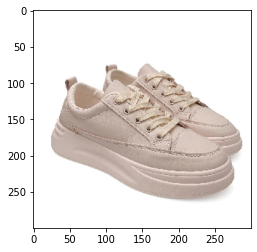

In [16]:
#identify path and folder

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import matplotlib.pyplot as plt

folder = '00'
nama_file = '056f87eb75bf82dcae3f14a33a7f3e2a.jpg'
x = load_img('/content/drive/My Drive/Colab Notebooks/dataset/%s/%s' %(folder, nama_file), target_size=(300,300))
plt.imshow(x)

In [19]:
#transfer image into list 

list_pict = []

for i in range(0, len(df)) :
  if (df.iloc[i,1] == 0):
    folder = '00'
  elif (df.iloc[i,1] == 1) :
    folder = '01'
  elif (df.iloc[i,1] == 2) :
    folder = '02'
  elif (df.iloc[i,1] == 3) :
    folder = '03'
  else:
    folder = '04'
  
  nama_file = df.iloc[i,0]
  x = load_img('/content/drive/My Drive/Colab Notebooks/dataset/%s/%s' %(folder, nama_file), target_size=(300,300))
  x = img_to_array(x)
  list_pict.append(x)

In [22]:
import numpy as np
np.array(list_pict).shape

(199, 300, 300, 3)

In [23]:
#transfer label into list

list_category = list(df.category)
np.array(list_category).shape

(199,)

### Modelling Part

In [36]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


model = keras.Sequential([keras.layers.Flatten(input_shape=(300, 300, 3)), #Flatten has the same size with image
                          keras.layers.Dense(100, activation=tf.nn.relu), #optional dense in neural network
                          keras.layers.Dense(5,activation=tf.nn.softmax) #using softmax as activation function
])

model.compile (optimizer=keras.optimizers.Adam(),  #using Adam optimizer
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

In [37]:
#train the model using 30 epoch

batch_model = model.fit(np.array(list_pict), np.array(list_category), validation_split=0.3, epochs=150, verbose=1)

Epoch 1/150
5/5 [==============================] - 1s 170ms/step - loss: 53814.0859 - accuracy: 0.1295 - val_loss: 161074.9375 - val_accuracy: 0.0000e+00
Epoch 2/150
5/5 [==============================] - 1s 151ms/step - loss: 39101.7539 - accuracy: 0.3237 - val_loss: 149472.8594 - val_accuracy: 0.0000e+00
Epoch 3/150
5/5 [==============================] - 1s 151ms/step - loss: 19657.2969 - accuracy: 0.3597 - val_loss: 109715.3281 - val_accuracy: 0.3500
Epoch 4/150
5/5 [==============================] - 1s 149ms/step - loss: 10054.7520 - accuracy: 0.4748 - val_loss: 108811.6016 - val_accuracy: 0.0000e+00
Epoch 5/150
5/5 [==============================] - 1s 150ms/step - loss: 5678.3877 - accuracy: 0.6259 - val_loss: 108253.2344 - val_accuracy: 0.3333
Epoch 6/150
5/5 [==============================] - 1s 152ms/step - loss: 4292.2495 - accuracy: 0.6763 - val_loss: 114183.7344 - val_accuracy: 0.1000
Epoch 7/150
5/5 [==============================] - 1s 152ms/step - loss: 3669.9695 - accur

In [41]:
print(batch_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


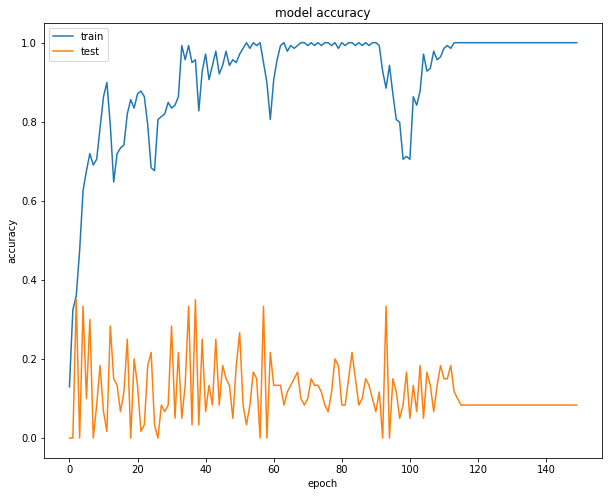

In [43]:
#accurcay plotting

from matplotlib.pyplot import figure

figure(figsize= (10, 8))
plt.plot(batch_model.history['accuracy'])
plt.plot(batch_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

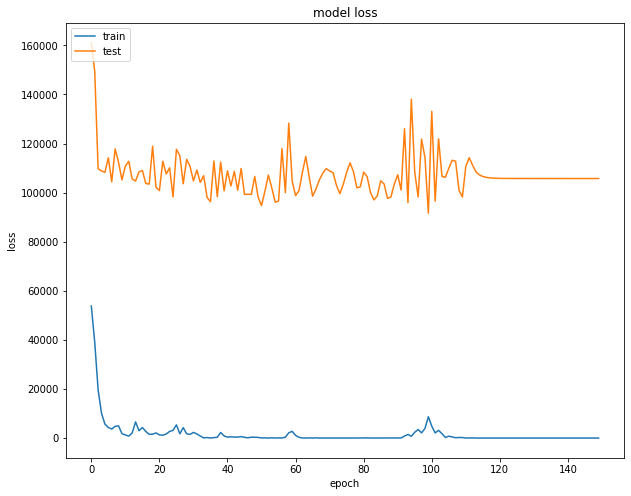

In [44]:
#loss plotting

from matplotlib.pyplot import figure

figure(figsize= (10, 8))
plt.plot(batch_model.history['loss'])
plt.plot(batch_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Testing Image

shoes


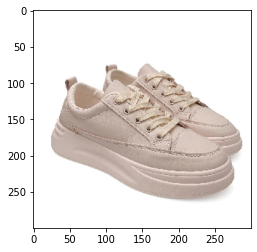

In [45]:
x_test1 = load_img('/content/drive/My Drive/Colab Notebooks/dataset/00/056f87eb75bf82dcae3f14a33a7f3e2a.jpg', target_size=(300,300))
plt.imshow(x_test1)
x_test1 = img_to_array(x_test1)


list_test = []
list_test.append(x_test1)

y = model.predict(np.array(list_test))

if (np.argmax(y) == 0) :
  print('shoes')
elif (np.argmax(y) == 1) :
  print('monitor')
elif (np.argmax(y) == 2) :
  print('car')
elif (np.argmax(y) == 3) :
  print('woman fashion')
else:
  print('hat')

car


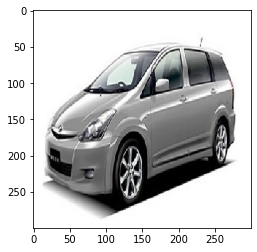

In [47]:
x_test1 = load_img('/content/drive/My Drive/Colab Notebooks/dataset/02/7513097232_7935b8bd99.jpg', target_size=(300,300))
plt.imshow(x_test1)
x_test1 = img_to_array(x_test1)


list_test = []
list_test.append(x_test1)

y = model.predict(np.array(list_test))

if (np.argmax(y) == 0) :
  print('shoes')
elif (np.argmax(y) == 1) :
  print('monitor')
elif (np.argmax(y) == 2) :
  print('car')
elif (np.argmax(y) == 3) :
  print('woman fashion')
else:
  print('hat')

shoes


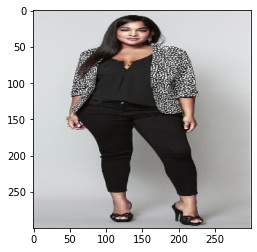

In [48]:
x_test1 = load_img('/content/drive/My Drive/Colab Notebooks/dataset/03/695027-fashion-wanita.jpg', target_size=(300,300))
plt.imshow(x_test1)
x_test1 = img_to_array(x_test1)


list_test = []
list_test.append(x_test1)

y = model.predict(np.array(list_test))

if (np.argmax(y) == 0) :
  print('shoes')
elif (np.argmax(y) == 1) :
  print('monitor')
elif (np.argmax(y) == 2) :
  print('car')
elif (np.argmax(y) == 3) :
  print('woman fashion')
else:
  print('hat')

**From the plot above, this model is overfitting very high. So we can not conclude that accuracy is high has the high performance**